<a href="https://colab.research.google.com/github/oliverwsd/Python-for-machine-learning-/blob/master/ml_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

class Perceptron(object):
  # eta: learning rate (between 0 and 1)
  # n_iter: passes over the training dataset
  # w_ : weights after fitting
  # errors: number of misclassifications in every epoch

  def __init__(self,	eta=0.01,	n_iter=10):
    self.eta = eta
    self.n_iter = n_iter 
  
  def fit(self,X,y):
    self.w_ = np.zeros(1	+	X.shape[1])	#	Add	w_0
    self.errors_	=	[]
    for _ in range(self.n_iter):
      errors = 0
      for xi,target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self,X):
    # activation function
    return np.dot(X,self.w_[1:]) + self.w_[0]
  
  def predict(self, X):
    #二分类输出
    return np.where(self.net_input(X)	>=	0.0,	1,	-1)


In [6]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
# 抽取出前100条样本，这正好是Setosa和Versicolor对应的样本，我们将Versicolor 对应的数据作为类别1，Setosa对应的作为-1。
# 对于特征，我们抽取出sepal	length和petal length两维度特征，然后用散点图对数据进行可视化:
%matplotlib inline
import matplotlib.pyplot as plt

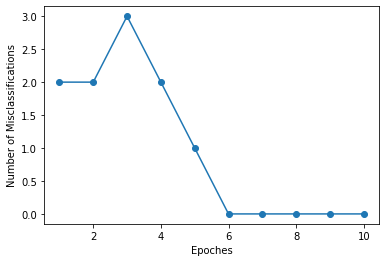

In [14]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa',-1,1)
X = df.iloc[0:100, [0,2]].values

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of Misclassifications')
plt.show()

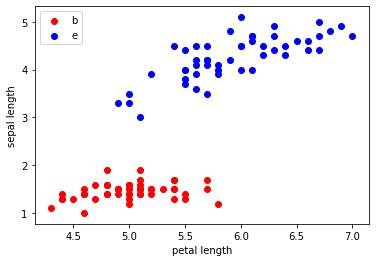

In [18]:
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='o', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend('best')
plt.show()